# Predicting Boston Housing Prices

The dataset for this project originates from the UCI Machine Learning Repository. The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts.

In [65]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt 

%matplotlib inline
   
print ("loaded successfully")

loaded successfully


In [66]:
from sklearn.datasets import load_boston
ds = load_boston()

In [67]:
ds.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [68]:
ds.DESCR

"Boston House Prices dataset\n===========================\n\nNotes\n------\nData Set Characteristics:  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive\n    \n    :Median Value (attribute 14) is usually the target\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000\n

In [69]:
boston = pd.DataFrame(ds.data, columns=ds.feature_names)
boston.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

#### Add MEDV (target variable) to the dataset

In [70]:
boston['MEDV'] = ds.target

In [71]:
boston.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2

### Data Preprocessing

In [72]:
#look for null values
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

### Exploratory data analysis

C:\Users\USER\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


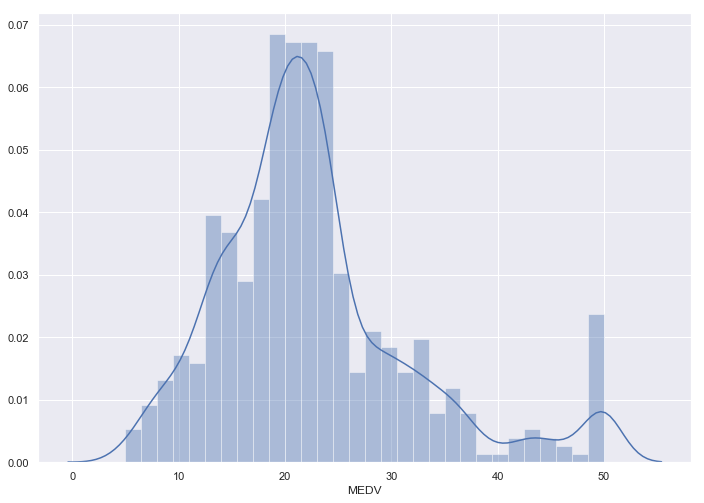

In [73]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston['MEDV'], bins=30)
plt.show()

The target variable MEDV is distributed normally with outliers

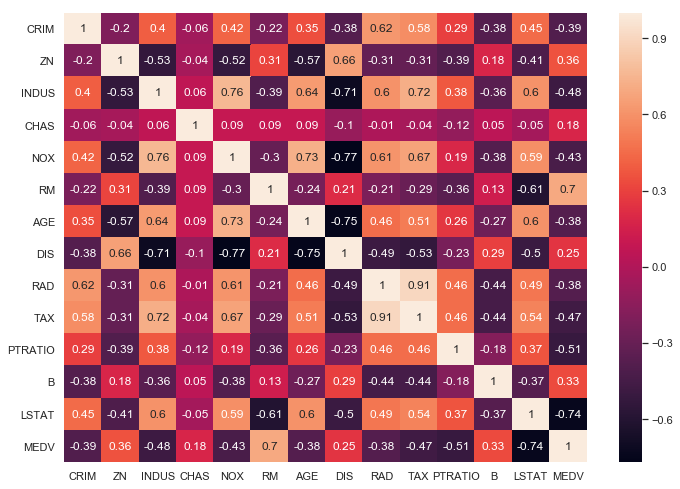

In [74]:
# correlation matrix
correlation_matrix = boston.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

- To fit a linear regression model, we select those features which have a high correlation with our target variable MEDV. By looking at the correlation matrix we can see that RM has a strong positive correlation with MEDV (0.7) where as LSTAT has a high negative correlation with MEDV(-0.74)
- An important point in selecting features for a linear regression model is to check for multi-co-linearity. The features RAD, TAX have a correlation of 0.91. These feature pairs are strongly correlated to each other. We should not select both these features together for training the model. Check this for an explanation. Same goes for the features DIS and AGE which have a correlation of -0.75.
- Based on the above observations we will RM and LSTAT as our features. Using a scatter plot let’s see how these features vary with MEDV.
- RM - Average no. of Rooms
- LSTAT - % of lower status people

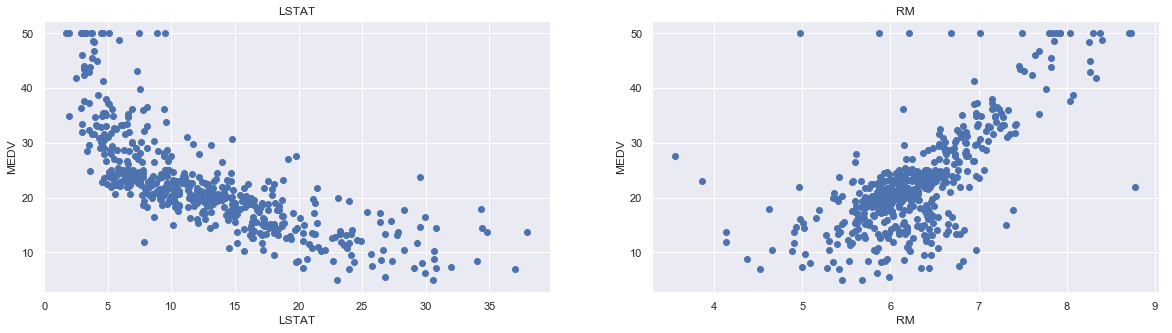

In [75]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = boston['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

#### Statistics of the housing prices

In [76]:
prices = boston['MEDV']
minimum_price = np.min(prices)   #minimum price
maximum_price = np.max(prices)   #maximum price
mean_price = np.mean(prices)     #mean
median_price = np.median(prices) #median
std_price = np.std(prices)       #standard deviation

# Show the calculated statistics
print ("Statistics for Boston housing dataset:\n")
print ("Minimum price: ${:,.2f}".format(minimum_price*1000))
print ("Maximum price: ${:,.2f}".format(maximum_price*1000))
print ("Mean price: ${:,.2f}".format(mean_price*1000))
print ("Median price ${:,.2f}".format(median_price*1000))
print ("Standard deviation of prices: ${:,.2f}".format(std_price*1000))

Statistics for Boston housing dataset:

Minimum price: $5,000.00
Maximum price: $50,000.00
Mean price: $22,532.81
Median price $21,200.00
Standard deviation of prices: $9,188.01


#### Observations:
- The prices increase as the value of RM increases linearly. There are few outliers and the data seems to be capped at 50.
- The prices tend to decrease with an increase in LSTAT. Though it doesn’t look to be following exactly a linear line.

The main goal of this project is to construct a working model which has the capability of predicting the value of houses, we have separated the dataset into features and the target variable. The features, 'RM', 'LSTAT', and 'PTRATIO', give us quantitative information about each data point. The target variable, 'MEDV', will be the variable we seek to predict. These are stored in features and prices, respectively.

### Preparing for model training

In [99]:
boston.drop(['CRIM','ZN','INDUS','CHAS','NOX','AGE','DIS','RAD','TAX','B','PTRATIO'], axis =1)

RM  LSTAT  MEDV
0    6.575   4.98  24.0
1    6.421   9.14  21.6
2    7.185   4.03  34.7
3    6.998   2.94  33.4
4    7.147   5.33  36.2
5    6.430   5.21  28.7
6    6.012  12.43  22.9
7    6.172  19.15  27.1
8    5.631  29.93  16.5
9    6.004  17.10  18.9
10   6.377  20.45  15.0
11   6.009  13.27  18.9
12   5.889  15.71  21.7
13   5.949   8.26  20.4
14   6.096  10.26  18.2
15   5.834   8.47  19.9
16   5.935   6.58  23.1
17   5.990  14.67  17.5
18   5.456  11.69  20.2
19   5.727  11.28  18.2
20   5.570  21.02  13.6
21   5.965  13.83  19.6
22   6.142  18.72  15.2
23   5.813  19.88  14.5
24   5.924  16.30  15.6
25   5.599  16.51  13.9
26   5.813  14.81  16.6
27   6.047  17.28  14.8
28   6.495  12.80  18.4
29   6.674  11.98  21.0
..     ...    ...   ...
476  6.484  18.68  16.7
477  5.304  24.91  12.0
478  6.185  18.03  14.6
479  6.229  13.11  21.4
480  6.242  10.74  23.0
481  6.750   7.74  23.7
482  7.061   7.01  25.0
483  5.762  10.42  21.8
484  5.871  13.34  20.6
485  6.312  10.58  21.2
486  6.114  14.98  19.1
487  5.905  11.45  20.6
488  5.454  18.06  15.2
489  5.414  23.97   7.0
490  5.093  29.68   8.1
491  5.983  18.07  13.6
492  5.983  13.35  20.1
493  5.707  12.01  21.8
494  5.926  13.59  24.5
495  5.670  17.60  23.1
496  5.390  21.14  19.7
497  5.794  14.10  18.3
498  6.019  12.92  21.2
499  5.569  15.10  17.5
500  6.027  14.33  16.8
501  6.593   9.67  22.4
502  6.120   9.08  20.6
503  6.976   5.64  23.9
504  6.794   6.48  22.0
505  6.030   7.88  11.9

[506 rows x 3 columns]

In [100]:
#concating columns
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ['LSTAT','RM'])
Y = boston['MEDV']

In [101]:
#splitting data to test and train set
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


### Training and testing the model : Linear Regression

In [102]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Model Evaluation : Linear Regression

In [103]:
from sklearn.metrics import r2_score
# model evaluation for training set
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 5.6371293350711955
R2 score is 0.6300745149331701


The model performance for testing set
--------------------------------------
RMSE is 5.13740078470291
R2 score is 0.6628996975186954


### Testing

In [104]:
# Produce a matrix for client data
client_data = [[5, 17], # Client 1
               [4, 32], # Client 2
               [8, 3]]  # Client 3

# Show predictions
for i, price in enumerate(lin_model.predict(client_data)):
    print ("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price*1000))

Predicted selling price for Client 1's home: $77,169.69
Predicted selling price for Client 2's home: $146,727.75
Predicted selling price for Client 3's home: $10,766.57
